# NIKHIL RAJURKAR

Linkedin: https://www.linkedin.com/in/nikhil-rajurkar-9130nikh/

GitHub: https://github.com/Nikhilrajurkar

# Task #3:Performing EDA on SampleSuperstore Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df=df.drop(['Postal Code'],axis=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.duplicated().sum()

50

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(9944, 12)

In [9]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:>

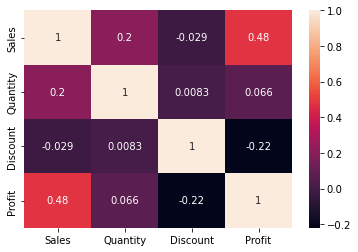

In [10]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [11]:
print("United States Stores-")
print("Number of states(where stores are present) are: ",df['State'].nunique())
print("Number of cities(where stores are present) are: ",df['City'].nunique())
print("There are {} different types of regions namely: {}".format(df['Region'].nunique(),[x for x in df['Region'].unique()]))

United States Stores-
Number of states(where stores are present) are:  49
Number of cities(where stores are present) are:  531
There are 4 different types of regions namely: ['South', 'West', 'Central', 'East']


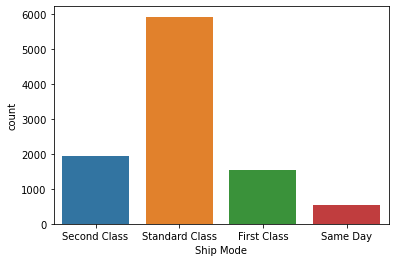

In [12]:
sns.countplot(x= df['Ship Mode'])
plt.show()

'Standard Class' is the most used shipping mode

C:\Users\ACER\AppData\Local\Temp/ipykernel_5820/1448077267.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 720x1152 with 0 Axes>

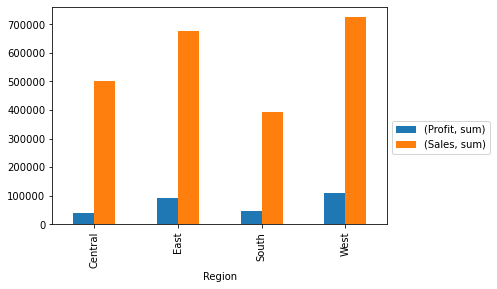

In [13]:
plt.figure(figsize=(10,16))
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.legend(bbox_to_anchor =(1,0.5))
plt.show()

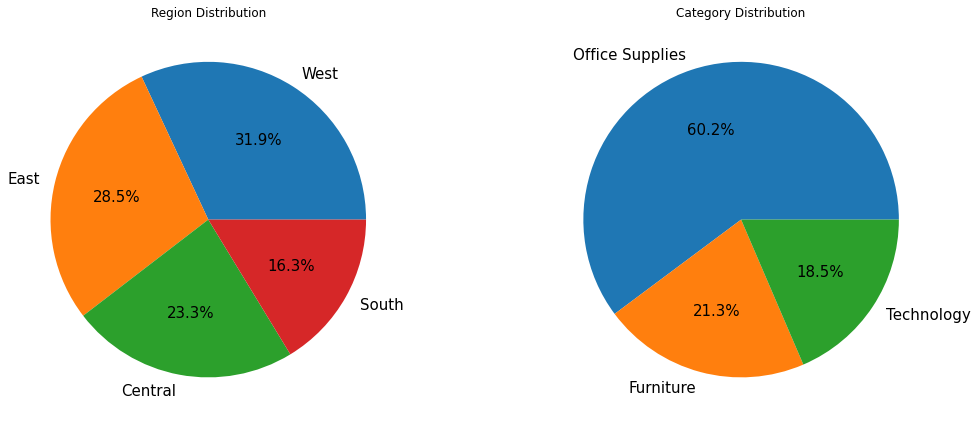

In [14]:
#Distribution of regions and categoty
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
textprops = {"fontsize":15}
plt.title("Region Distribution")
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%', textprops=textprops)
plt.subplot(1,2,2)
plt.title("Category Distribution")
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%', textprops=textprops)
plt.tight_layout()
plt.show()

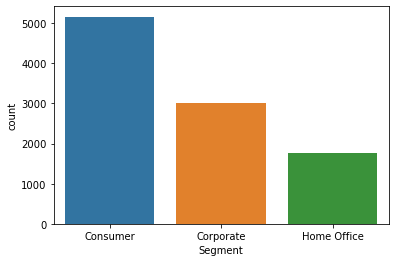

In [15]:
sns.countplot(x= df['Segment'])
plt.show()

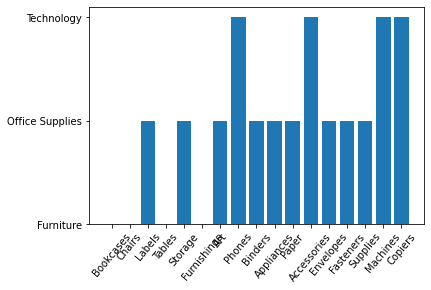

In [16]:
plt.bar(df['Sub-Category'], df['Category'])
plt.xticks(rotation=50)
plt.show()

C:\Users\ACER\AppData\Local\Temp/ipykernel_5820/4082802046.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 864x1440 with 0 Axes>

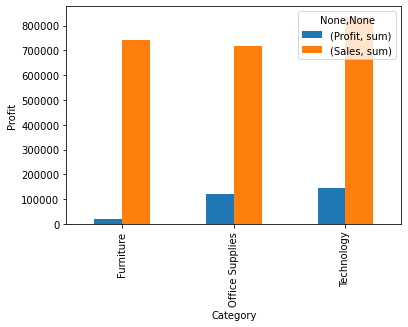

In [17]:
plt.figure(figsize=(12,20))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

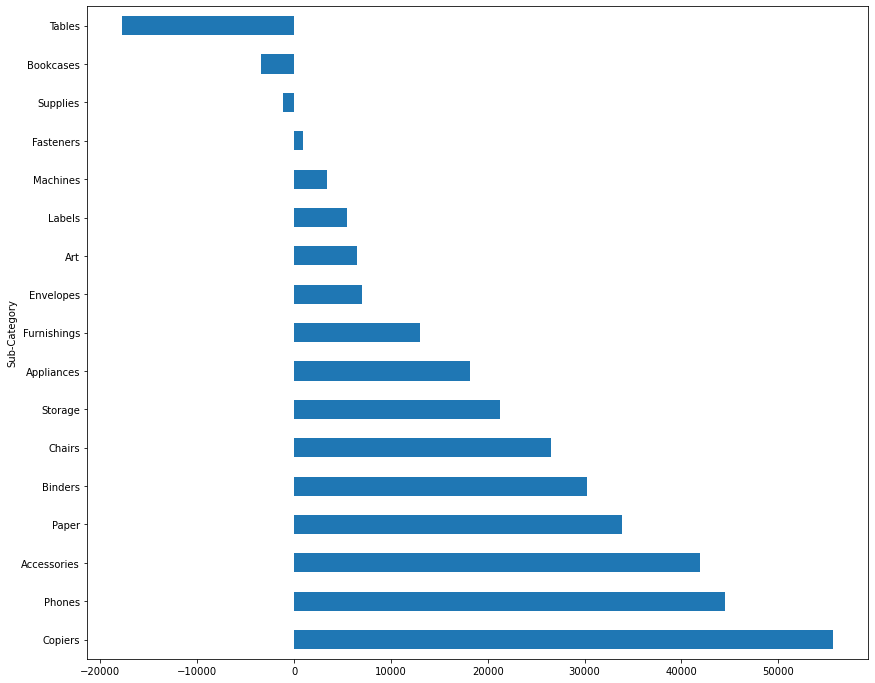

In [18]:
plt.figure(figsize=(14,12))
sub_cat_p=df.groupby('Sub-Category')['Profit'].sum().nlargest(n=100)
sub_cat_p.plot.barh()  # h for horizontal representation

Conclusion

We should limit sales of Furniture and increase that of Technology and Office Suppliers as Furniture has very less Profit as compared to Sales.

Copiers and Phones have the highest profit and profit and Tables have a NEGATIVE profit

'Standard Class' is the most used shipping mode